# K-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Import the dataset

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200C07082E8>]],
      dtype=object)

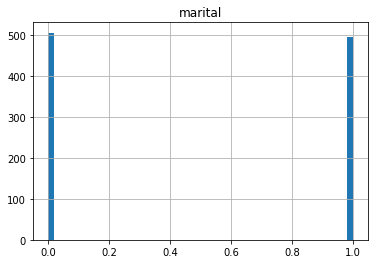

In [9]:
df.hist(column='marital', bins=50)

### Convert pandas dataframe to numpy array (to use with sklearn)

In [10]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]])

In [12]:
Y = df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalize data

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train test split

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### Classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

### Prediction

In [25]:
yhat = neigh.predict(X_test)
yhat

array([2, 3, 4, 3, 1, 3, 1, 3, 1, 1, 3, 4, 2, 3, 1, 3, 3, 1, 1, 2, 2, 2,
       4, 4, 2, 1, 4, 3, 3, 2, 4, 3, 1, 2, 3, 1, 1, 1, 1, 1, 4, 2, 3, 3,
       1, 1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 1, 2, 4,
       4, 3, 2, 1, 3, 2, 2, 4, 1, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2, 3,
       2, 3, 2, 1, 1, 1, 3, 1, 4, 3, 3, 1, 2, 4, 4, 1, 3, 4, 3, 1, 4, 2,
       2, 3, 2, 2, 3, 2, 4, 2, 1, 1, 3, 1, 2, 3, 2, 1, 2, 2, 4, 4, 1, 3,
       4, 1, 1, 3, 1, 1, 3, 1, 2, 2, 1, 4, 1, 4, 3, 4, 1, 3, 1, 2, 1, 1,
       3, 1, 2, 3, 4, 2, 1, 3, 3, 4, 2, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 4,
       1, 2, 1, 1, 1, 3, 2, 2, 1, 4, 4, 1, 2, 1, 3, 1, 4, 3, 3, 4, 2, 1,
       3, 4], dtype=int64)

### Accuracy evaluation

In [28]:
from sklearn import metrics
print('Train set accuracy: ', metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print('Test set accuracy: ', metrics.accuracy_score(Y_test,neigh.predict(X_test)))

Train set accuracy:  0.565
Test set accuracy:  0.29


### Trying out multiple values for k

In [46]:
mean_acc = np.zeros(199)

for n in range(1, 200):
    
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = (metrics.accuracy_score(Y_test, yhat))
    
    

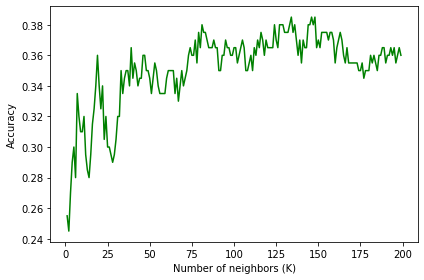

In [47]:
plt.plot(range(1, 200), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
print("The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was  0.385 with k= 134


In [41]:
li = [2,4,2,3]
max(li)

4